# Tutorial #4

1. Write a function `my_lagrange(x, y, X)` where the output `Y` is the Lagrange interpolation of the data points contained in `x` and `y` computed at `X`. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing `lagrange` function from `SciPy`.

In [1]:
import numpy as np

def my_lagrange(x, y, X):
    n = len(x)
    kk = len(X)
    Y = np.zeros_like(X) #Y = np.zeros(X.shape)
    for k in range(kk):
        for i in range(n):
            L = 1
            for j in range(n):
                if j != i:
                    L *= (X[k] - x[j])/(x[i] - x[j])

            Y[k] += y[i]*L
            
    return Y

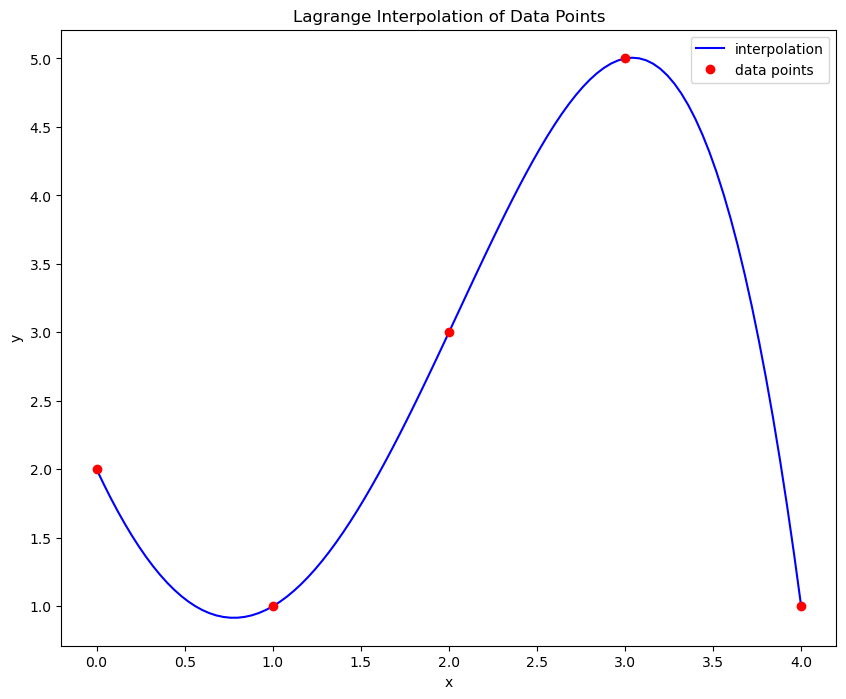

In [2]:
import matplotlib.pyplot as plt

# Test case
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]
X = np.linspace(0, 4, 101)
Y = my_lagrange(x, y, X)
plt.figure(figsize = (10,8))
plt.plot(X, Y, "b", label = "interpolation")
plt.plot(x, y, "ro", label = "data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Lagrange Interpolation of Data Points")
plt.legend()
plt.show()

2. Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using Newton’s polynomial interpolation.

$$f_4(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + a_3(x-x_0)(x-x_1)(x-x_2) + a_4(x-x_0)(x-x_1)(x-x_2)(x-x_3)$$

|x  |F[ , ]|F[ , , ]|F[ , , , ]|F[ , , , , ]|
|:-:|:-:   |:-:     |:-:       |:-:         |
|0  |      |        |          |            |
|   |-1    |        |          |            |
|1  |      |3/2     |          |            |
|   |2     |        |-1/2      |            |
|2  |      |0       |          |-1/8        |
|   |2     |        |-1        |            |
|3  |      |-3      |          |            |
|   |-4    |        |          |            |
|4  |      |        |          |            |

$$a_0 = 2,\quad a_1 = -1,\quad a_2 = \frac{3}{2},\quad a_3 = -\frac{1}{2},\quad a_4 = -\frac{1}{8}$$

$$f_4(x) = 2 - x + \frac{3}{2}x(x-1) - \frac{1}{2}x(x-1)(x-2) - \frac{1}{8}x(x-1)(x-2)(x-3)$$

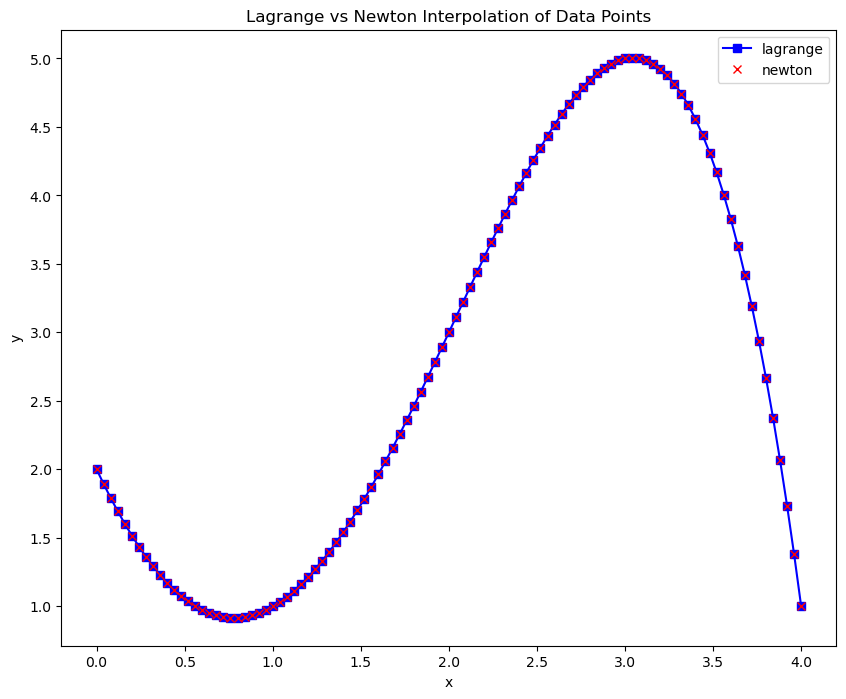

In [3]:
Y_lagrange = Y
Y_newton = 2 - X + (3/2)*X*(X-1) - (1/2)*X*(X-1)*(X-2) - (1/8)*X*(X-1)*(X-2)*(X-3)

plt.figure(figsize = (10,8))
plt.plot(X, Y_lagrange, "-bs", label = "lagrange")
plt.plot(X, Y_newton, "rx", label = "newton")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Lagrange vs Newton Interpolation of Data Points")
plt.legend()
plt.show()

3. Write a function `my_interp_plotter(x, y, X, option)` where `x` and `y` are arrays containing experimental data points, and `X` is an array that contains the coordinates for which an interpolation is desired. The input argument option should be a string, either “linear,” “cubic,” or “nearest.” Your function should produce a plot of the data points $(x,y)$ marked as red circles. The points $(X,Y)$, where `X` is the input and `Y` is the interpolation at the points contained in `X` defined by the input argument specified by option. The points $(X,Y)$ should be connected by a blue line. Be sure to include the title, axis labels, and a legend. Hint: You should use `interp1d` from `SciPy`, and checkout the `kind` option.

In [8]:
from scipy.interpolate import interp1d

def my_interp_plotter(x, y, X, option):
    if option == "linear":
        f = interp1d(x, y, kind = 'linear')
    elif option == "cubic":
        f = interp1d(x, y, kind = 'cubic')
    elif option == "nearest":
        f = interp1d(x, y, kind = 'nearest')
        
    Y = f(X)
    
    plt.figure(figsize = (10,8))
    plt.plot(X, Y, "b", label = "interpolation")
    plt.plot(x, y, "ro", label = "data points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{option} interpolation of data")
    plt.legend()
    plt.show()

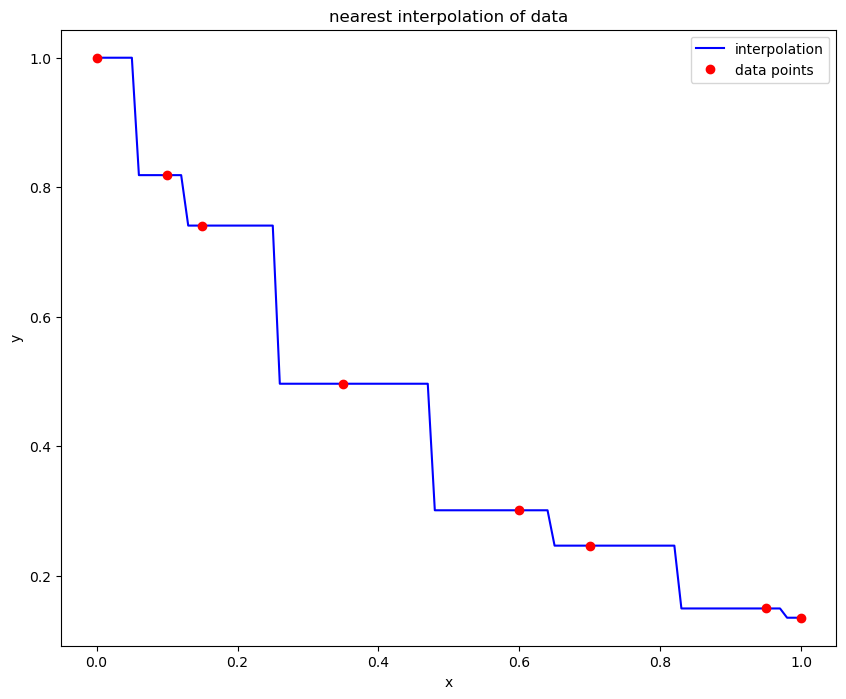

In [9]:
# Test case
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])
my_interp_plotter(x, y, np.linspace(0, 1, 101), "nearest")

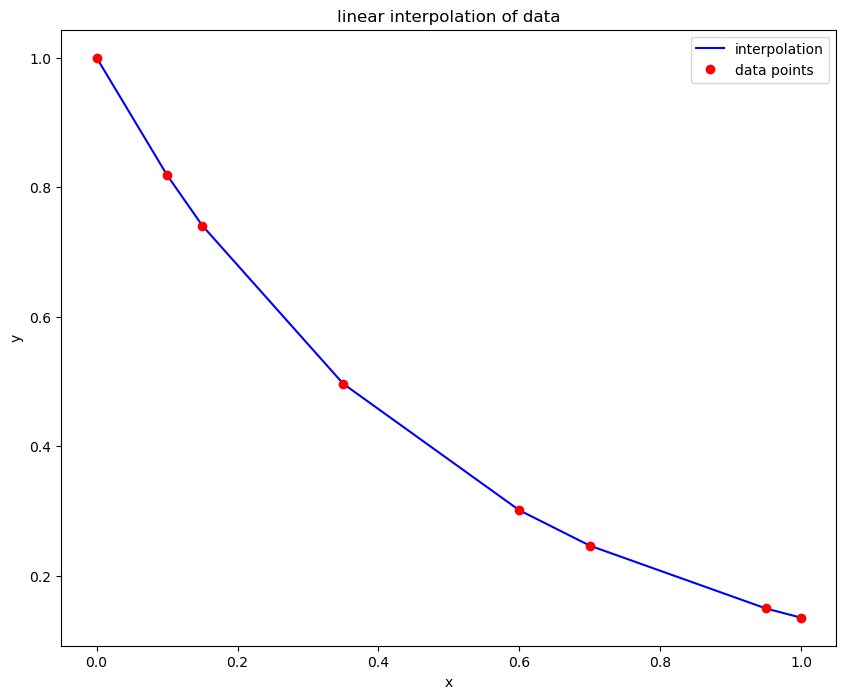

In [10]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "linear")

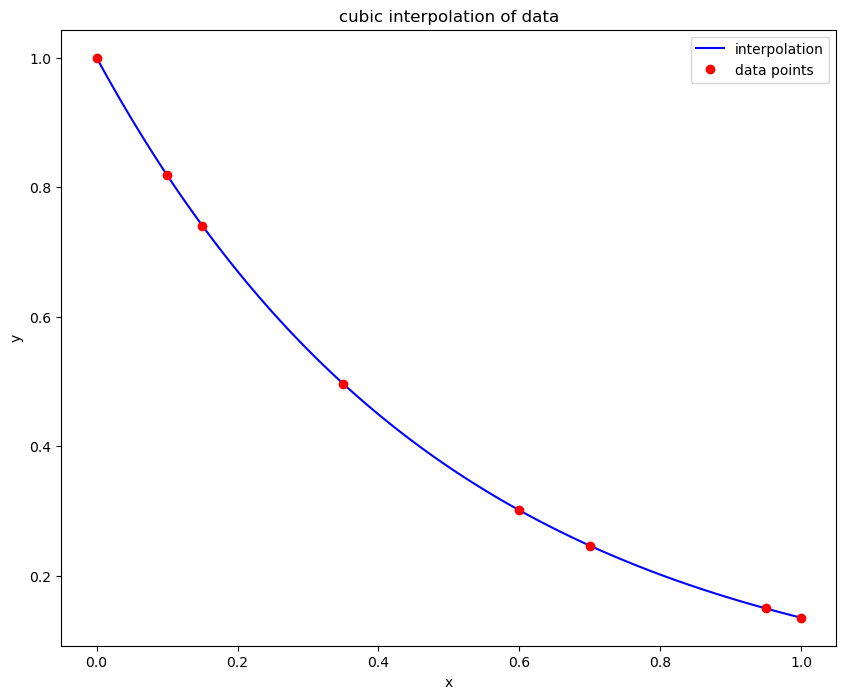

In [11]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "cubic")

4. Write a function `my_D_cubic_spline(x, y, X, D)`, where the output `Y` is the cubic spline interpolation at X taken from the data points contained in x and y. Instead of the standard pinned endpoint conditions (i.e., $S_1''(x_1) = 0$ and $S_{n-1}''(x_n) = 0$), use the endpoint conditions $S_1'(x_1) = D$ and $S_{n-1}'(x_n) = D$ (i.e., the slopes of the interpolating polynomials at the endpoints are $D$).

In [12]:
from scipy.interpolate import CubicSpline

def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type = ((1, D), (1, D)))
    Y = f(X)
    
    return Y

In [13]:
# Test Cases
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)
# Solution: Y = 0.54017857
Y = my_D_cubic_spline(x, y, 1.5, 1)
print(Y)

0.5401785714285714


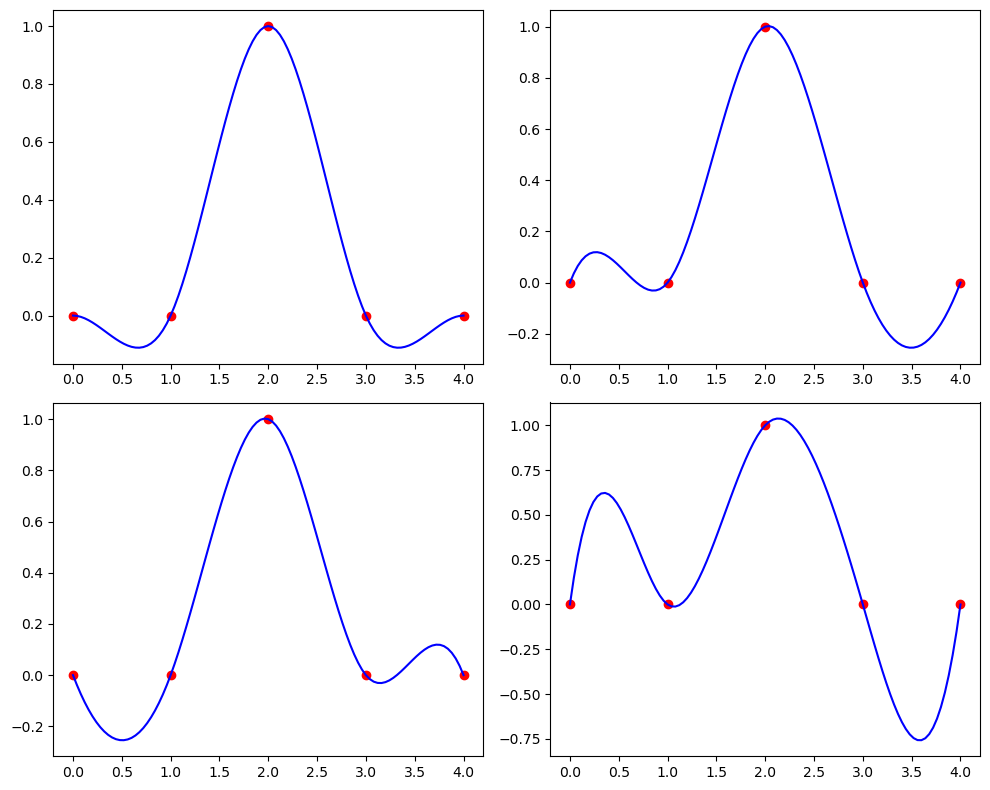

In [14]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()